<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/26_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Support Vector Machine
### scikit-learn
>Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  
>
>Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
>
>Podstawowa biblioteka do uczenia maszynowego w języku Python.
>
>Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```
### Spis treści:
1. [Import bibliotek](#1)
2. [Wczytanie danych](#2)
3. [Wyświetlenie kilku obrazów](#3)
4. [Przygotowanie danych do modelu](#4)
5. [Trenowanie modelu](#5)
6. [Ocena modelu](#6)
7. [Wyświetlenie błędnych predykcji](#7)

### <a name='1'></a> Import bibliotek

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

### <a name='2'></a> Wczytanie danych

In [2]:
digits = datasets.load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
images = digits.images
labels = digits.target
print('images shape:', images.shape)
print('labels shape:', labels.shape)

images shape: (1797, 8, 8)
labels shape: (1797,)


In [5]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### <a name='3'></a> Wyświetlenie kilku obrazów

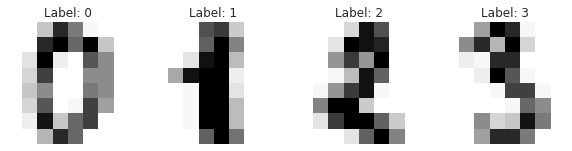

In [6]:
plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(list(zip(images, labels))[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title('Label: {}'.format(index, label))

### <a name='4'></a> Przygotowanie danych do modelu

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [8]:
X_train[0]

array([ 0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,
        0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  1.,  3.,  0.,  0.,  4.,
       16.,  5.,  1., 15., 11.,  0.,  0., 10., 15.,  4., 13., 16.,  3.,
        0.,  0.,  8., 16., 16., 16., 10.,  0.,  0.,  0.,  2., 11., 12.,
       15.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.])

In [9]:
y_train[0]

4

### <a name='5'></a> Trenowanie modelu

In [10]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### <a name='6'></a> Ocena modelu

In [11]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 9, 7, 8, 4, 0, 8, 9, 9, 1, 0, 6, 6, 3, 0, 5, 9, 1, 1, 4, 6, 8,
       6, 7, 5, 0, 1, 6, 5, 5, 9, 8, 9, 6, 8, 3, 4, 7, 5, 9, 6, 2, 0, 3,
       9, 9, 2, 0, 0, 4, 5, 5, 6, 5, 8, 8, 7, 4, 1, 0, 7, 6, 8, 7, 4, 7,
       8, 2, 7, 8, 4, 4, 1, 3, 7, 7, 1, 8, 0, 6, 4, 0, 1, 5, 6, 1, 4, 5,
       6, 7, 6, 7, 9, 7, 3, 4, 7, 0, 1, 3, 1, 0, 6, 4, 8, 1, 3, 6, 5, 3,
       4, 5, 3, 1, 3, 1, 1, 5, 4, 8, 7, 6, 3, 2, 2, 8, 3, 6, 5, 3, 8, 0,
       3, 2, 8, 4, 7, 9, 9, 6, 4, 6, 4, 8, 5, 2, 8, 0, 4, 2, 9, 3, 7, 2,
       1, 0, 0, 8, 9, 7, 2, 4, 9, 8, 6, 3, 5, 9, 4, 7, 6, 3, 1, 5, 5, 0,
       1, 0, 3, 2, 7, 4, 0, 5, 2, 8, 2, 9, 7, 0, 5, 2, 8, 8, 4, 1, 2, 4,
       3, 1, 2, 3, 8, 9, 7, 7, 0, 8, 1, 9, 9, 5, 1, 5, 5, 9, 1, 5, 1, 0,
       8, 7, 9, 0, 0, 7, 9, 7, 7, 6, 7, 3, 8, 2, 2, 7, 1, 5, 1, 5, 2, 0,
       9, 7, 3, 1, 3, 8, 5, 7, 9, 9, 6, 4, 4, 9, 9, 8, 7, 2, 0, 9, 2, 7,
       7, 2, 5, 5, 8, 2, 8, 0, 0, 2, 8, 0, 7, 8, 2, 4, 7, 7, 7, 3, 8, 2,
       4, 8, 4, 7, 2, 5, 8, 0, 4, 9, 4, 5, 3, 2, 2,

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        53
           3       0.97      0.94      0.96        36
           4       1.00      1.00      1.00        43
           5       0.98      1.00      0.99        50
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        52
           8       0.96      1.00      0.98        48
           9       1.00      0.95      0.98        42

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 40]])

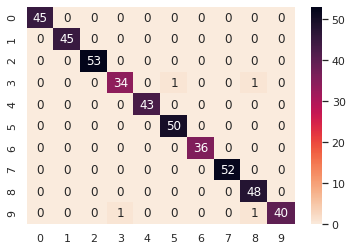

In [14]:
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [15]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

### <a name='7'></a> Wyświetlenie błędnych predykcji


In [16]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,1,1
1,9,9
2,7,7
3,8,8
4,4,4
5,0,0
6,8,8
7,9,9
8,9,9
9,1,1


In [17]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[125, 151, 213, 270]

In [18]:
results.loc[errors_idxs, :]

,y_pred,y_test
125,8,9
151,3,9
213,5,3
270,8,3


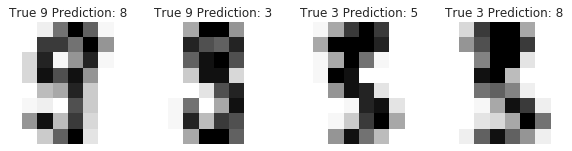

In [19]:
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")

### Zapisanie modelu

In [21]:
import joblib
joblib.dump(classifier, 'model.joblib')

['model.joblib']

In [22]:
new_classifier = joblib.load('model.joblib')
new_classifier.score(X_test, y_test)

0.9911111111111112